# Behaviour analysis of bonsai VR

In [1]:
from aeon.io.reader import Csv, Reader
import aeon.io.api as aeon
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import importlib as imp
import parse_bonsai_functions
imp.reload(parse_bonsai_functions)

<module 'parse_bonsai_functions' from '/nfs/nhome/live/skuroda/Workstation2025/Aimbot/preprocess/preprocess_alignment/nwb/behavior/Bonsai_ABCD/parse_bonsai_functions.py'>

## Parse mouse and date info into root session folder

In [2]:
mouse_id = "009"
date = "20251120"
root = "/ceph/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/"
session_path = parse_bonsai_functions.find_base_path(mouse_id, date, root)

Found folder: /ceph/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-009/ses-4LM030_date-20251120T134618


## Load all the relevant files
- settings (session and rig)
- events (odour phases)
- licks
- rewards
- position
- speed
- (analog data for precise timing)
- (optional cameras)

In [3]:
ses_settings, ses_rig_settings = parse_bonsai_functions.load_settings(session_path)

Save all event logs into pandas dataframe

In [4]:
sess_dataframe = parse_bonsai_functions.load_data(session_path)

Sanity check:

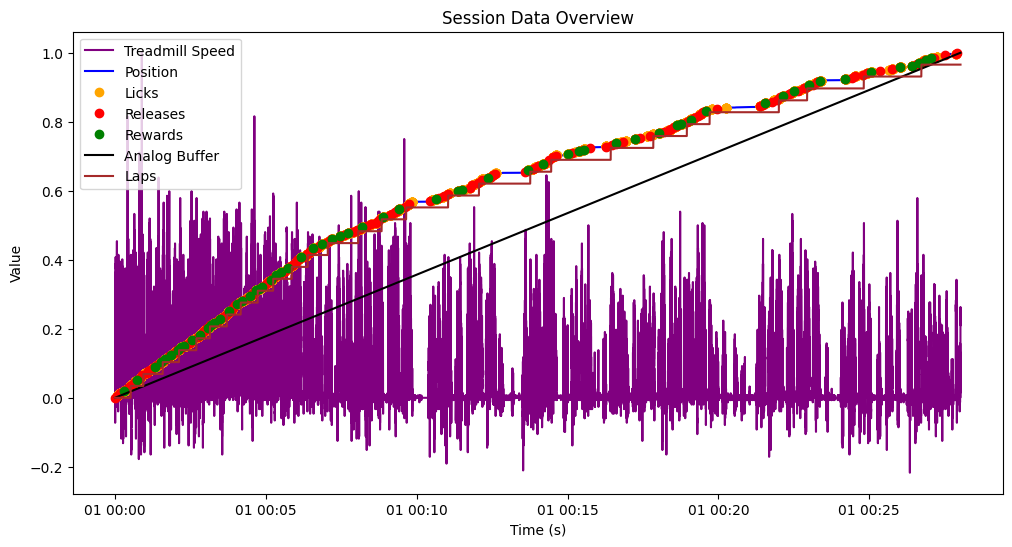

In [5]:
parse_bonsai_functions.plot_ethogram(sess_dataframe,ses_settings)

In [6]:
parse_bonsai_functions.print_sess_summary(sess_dataframe,ses_settings)

Session Summary:
Total Licks: 2800
Total Landmarks: 190
Total Rewards: 63
Hit Rate: 77.30%, False Alarm Rate: 1.00%, D-prime: 2.53
Targets Licked: 109 of 141, Distractors Licked: 0 of 49
rewarded odours: ['odour11' 'odour18' 'odour19'], rewarded textures: ['grass' 'light_squares' 'waves']
non-rewarded odours: ['odour6'], non-rewarded textures: ['grating1']


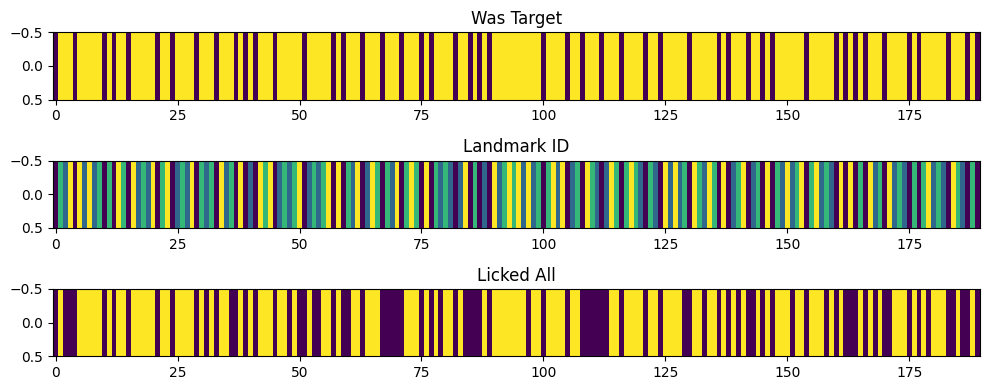

In [7]:
parse_bonsai_functions.plot_lick_lm(sess_dataframe,ses_settings)

## 2LM and 3LM training stages

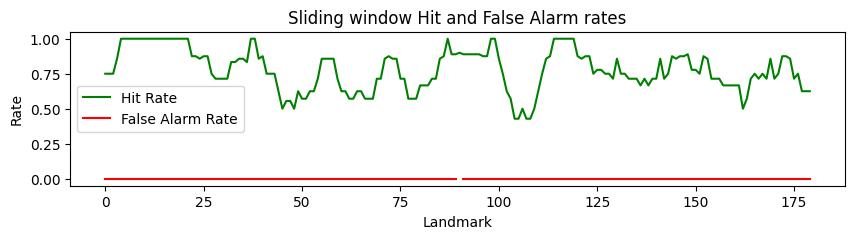

In [8]:
parse_bonsai_functions.plot_sw_hit_fa(sess_dataframe,ses_settings,window=10)

## Random world plots
For ABC sequencing for now

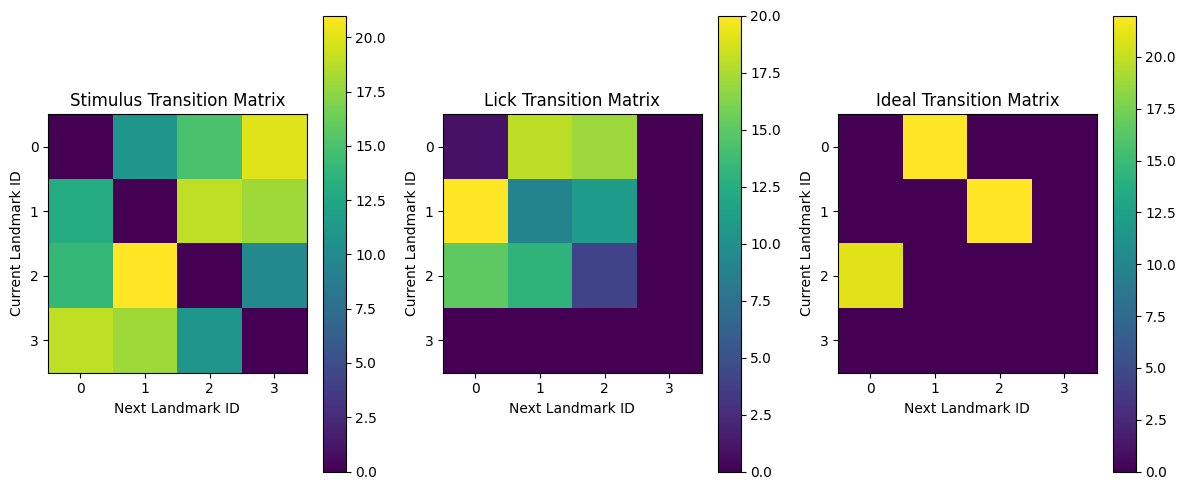

In [9]:
parse_bonsai_functions.plot_transition_matrix(sess_dataframe,ses_settings)

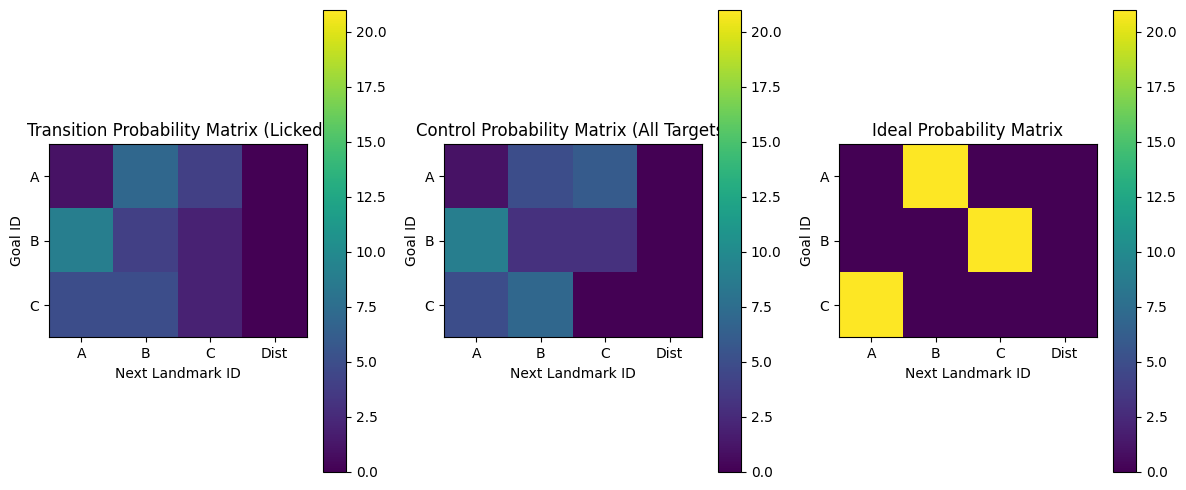

In [10]:
parse_bonsai_functions.plot_conditional_matrix(sess_dataframe,ses_settings)

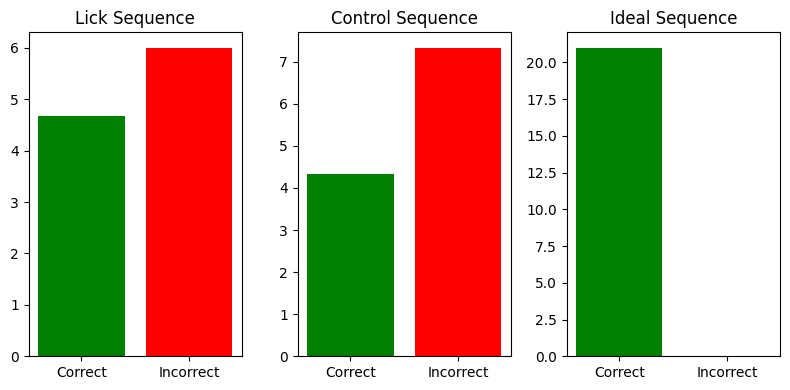

In [11]:
parse_bonsai_functions.plot_sequencing_ABC(sess_dataframe,ses_settings)

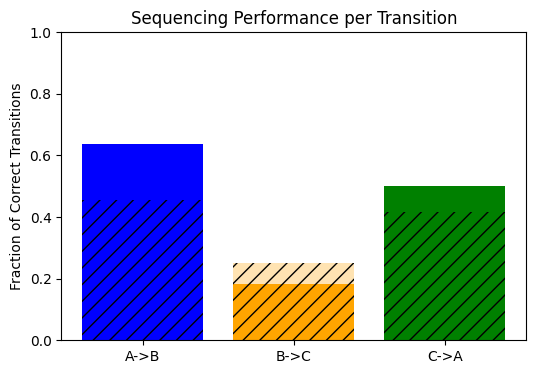

Sequencing Performance: 43.94%
Control Performance: 37.37%


0.4393939393939394

In [12]:
parse_bonsai_functions.plot_seq_fraction(sess_dataframe,ses_settings,test='control') 
# test can be 'transition' (actual performance) or 'control' (licked at all targets) or 'ideal' (licked perfectly in sequence)

## Stable world plots

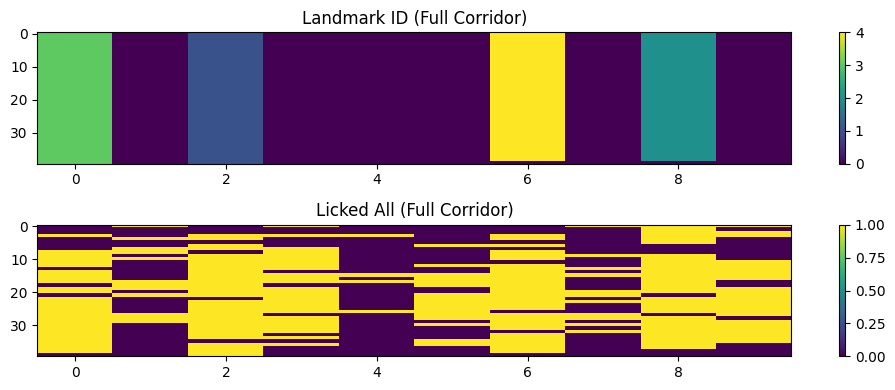

In [1025]:
parse_bonsai_functions.plot_full_corr(sess_dataframe,ses_settings)

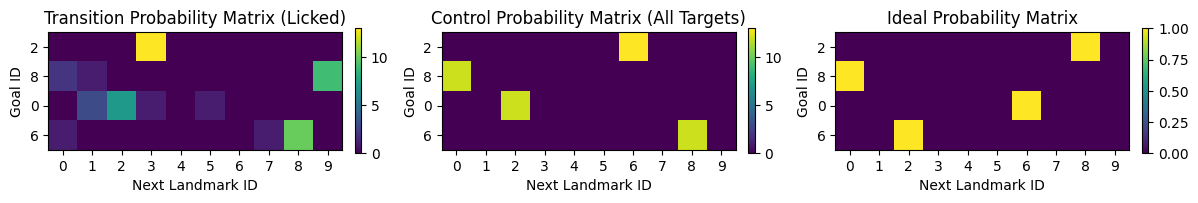

In [1026]:
parse_bonsai_functions.plot_stable_conditional_matrix(sess_dataframe,ses_settings)

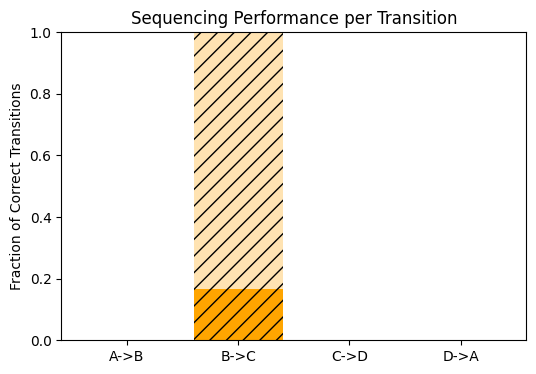

Sequencing Performance: 4.17%, (0.00%, 16.67%, 0.00%, 0.00%)
Control Performance: 25.00%, (0.00%, 100.00%, 0.00%, 0.00%)


In [1027]:
parse_bonsai_functions.plot_stable_seq_fraction(sess_dataframe,ses_settings,test='transition')

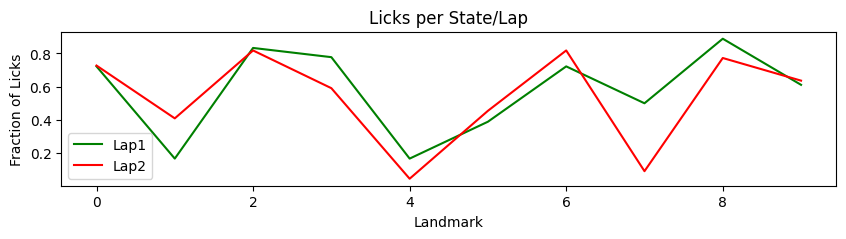

In [1028]:
parse_bonsai_functions.plot_licks_per_state(sess_dataframe, ses_settings)

/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py:927: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  speed_per_lap = sess_dataframe['Treadmill'][lap_idx]
/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py:928: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bin_ix = np.digitize(sess_dataframe['Position'][lap_idx], bin_edges)


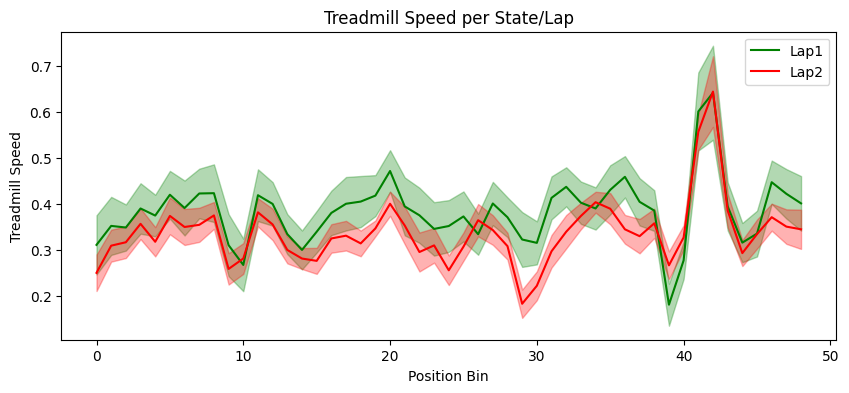

In [1045]:
parse_bonsai_functions.plot_speed_per_state(sess_dataframe, ses_settings)

Average Switch-Stay Ratio: 0.13


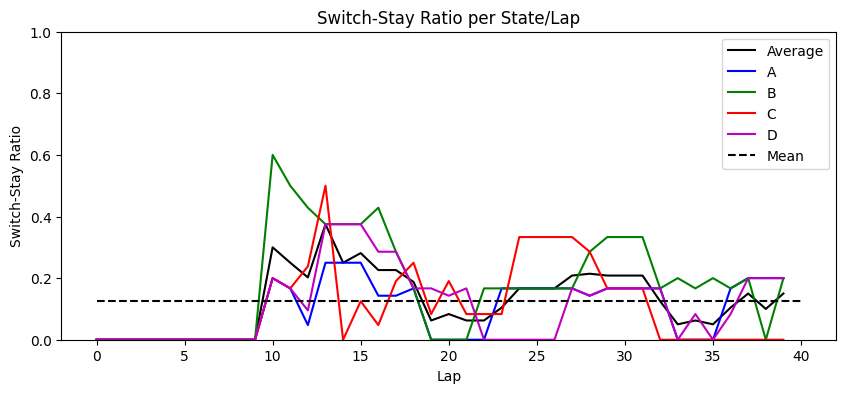

In [1054]:
parse_bonsai_functions.plot_sw_state_ratio(sess_dataframe, ses_settings)